In [72]:
import pandas as pd

In [74]:
data = pd.read_csv('merge_all.csv')

C:\Users\la96b\AppData\Local\Temp\ipykernel_33264\1546278181.py:1: DtypeWarning: Columns (26356,26360) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('merge_all.csv')


In [75]:
data.head()

,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAG,CTACTCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTGATCGGGGACGAACGGTCCGTAAGCTAATACCTTATGGAAGTGACGGTACCCGAATAGCAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAT,CTACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGCCTCGTGAGGCTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAACGATGACGGCCTTCGGGTTGTAAAGTTCTGTTATACGGGACGAATGGTACGACGGTCAATACCCGTCGTAAGTGACGGTACCGTAAGAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGT,...,CACGGAGTTAGCCGATCCTTATTCGTACGATACTTTCAGACAGATACACGTATCTGCGTTTACCCTCGTACAAAAGCAGTTTACAACTCATGGAGCCGTCATCCTGCACGCGGCATGGCTGGTTCAGACTTGCGTCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCAACCTCTCAGTCCGGCTACCGATCGTCGCCTTGGTGGGCCGTTACCTCACCAACTAGCTAATCGGACGCGAGGCCATCTCAAAGCGGATTGC,CACGTAGTTAGCCGGGGCTTCCTCCTTATTTACCGTCCTATATCAGCATTATTCACACTGACACCTCTCTTCAATAAGGACAGAGTTTTACAACCCGAAGGCCTTCTTCACTCACGCGGCATTGCTCCGTCAGGCTTTCGCCCATTGCGGAAGATTCCCCACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCACCCTCTCAGGCCGGCTACTGATCGTCGCCTTGGTAAGCCGCTACCTTACCAACTAGCTAATCAGACGCGGATCCATCTTTTTGCG,CACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATGAGCAAAGGTATTAACTTTACTCCCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTAGGTGAGCCGTTACCCCACCTACTAGCTAATCCCATCTGGGCACATCCGATGGCAA,Age,Sex,BMI,Country,Continent,Ethnicity,Study.Group
0,0,0,0,3100,0,241,0,0,0,0,...,0,0,0,61.0,M,19.5,India,Asia,Asian,Healthy
1,0,0,0,219,0,0,0,0,0,0,...,0,0,0,58.0,M,19.2,India,Asia,Asian,Healthy
2,0,0,0,0,30,0,0,0,0,0,...,0,0,0,50.0,F,17.9,India,Asia,Asian,Healthy
3,0,0,0,0,0,166,0,0,0,0,...,0,0,0,62.0,M,20.8,India,Asia,Asian,Healthy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,52.0,F,23.0,India,Asia,Asian,Healthy


In [76]:
!pip install xgboost
!pip install lightgbm

In [77]:
# First cell - Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = data.copy()

# Display the first few rows of the dataset
df.head()

,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CTCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAG,CTACTCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGGCGAAAGCCTGACGGAGCAACGCCGCGTGAGTGATGACGGCCTTCGGGTTGTAAAGCTCTGTGATCGGGGACGAACGGTCCGTAAGCTAATACCTTATGGAAGTGACGGTACCCGAATAGCAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,CCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAAT,CTACTCCTACGGGAGGCAGCAGTGGGGAATATTGCACAATGGGGGAAACCCTGATGCAGCGACGCCGCGTGGAGGAAGAAGGTCTTCGGATTGTAAACTCCTGTTGTTGAGGAAGATAATGACGGTACTCAACAAGGAAGTGACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGATG,TCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGCCTCGTGAGGCTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATG,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGGCGAGAGCCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGAGGAATATTGGTCAATGGACGAGAGTCTGAACCAGCCAAGTAGCGTGCAGGATGACGGCCCTATGGGTTGTAAACTGCTTTTATAAGGGAATAAAGTGAGTCTCGTGAGACTTTTTGCATGTACCTTATGAATAAGGACCGGCTAATTCCGTGCCAGCAGCCGCGGTAATAGT,CATCCTACGGGAGGCAGCAGTGGGGAATCTTCCGCAATGGACGAAAGTCTGACGGAGCAACGCCGCGTGAACGATGACGGCCTTCGGGTTGTAAAGTTCTGTTATACGGGACGAATGGTACGACGGTCAATACCCGTCGTAAGTGACGGTACCGTAAGAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATAGT,...,CACGGAGTTAGCCGATCCTTATTCGTACGATACTTTCAGACAGATACACGTATCTGCGTTTACCCTCGTACAAAAGCAGTTTACAACTCATGGAGCCGTCATCCTGCACGCGGCATGGCTGGTTCAGACTTGCGTCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCAACCTCTCAGTCCGGCTACCGATCGTCGCCTTGGTGGGCCGTTACCTCACCAACTAGCTAATCGGACGCGAGGCCATCTCAAAGCGGATTGC,CACGTAGTTAGCCGGGGCTTCCTCCTTATTTACCGTCCTATATCAGCATTATTCACACTGACACCTCTCTTCAATAAGGACAGAGTTTTACAACCCGAAGGCCTTCTTCACTCACGCGGCATTGCTCCGTCAGGCTTTCGCCCATTGCGGAAGATTCCCCACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGTTCACCCTCTCAGGCCGGCTACTGATCGTCGCCTTGGTAAGCCGCTACCTTACCAACTAGCTAATCAGACGCGGATCCATCTTTTTGCG,CACGGAGTTAGCCGGTGCTTCTTCTGCGGGTAACGTCAATGAGCAAAGGTATTAACTTTACTCCCTTCCTCCCCGCTGAAAGTACTTTACAACCCGAAGGCCTTCTTCATACACGCGGCATGGCTGCATCAGGCTTGCGCCCATTGTGCAATATTCCCCACTGCTGCCTCCCGTAGGAGTCTGGACCGTGTCTCAGTTCCAGTGTGGCTGGTCATCCTCTCAGACCAGCTAGGGATCGTCGCCTAGGTGAGCCGTTACCCCACCTACTAGCTAATCCCATCTGGGCACATCCGATGGCAA,Age,Sex,BMI,Country,Continent,Ethnicity,Study.Group
0,0,0,0,3100,0,241,0,0,0,0,...,0,0,0,61.0,M,19.5,India,Asia,Asian,Healthy
1,0,0,0,219,0,0,0,0,0,0,...,0,0,0,58.0,M,19.2,India,Asia,Asian,Healthy
2,0,0,0,0,30,0,0,0,0,0,...,0,0,0,50.0,F,17.9,India,Asia,Asian,Healthy
3,0,0,0,0,0,166,0,0,0,0,...,0,0,0,62.0,M,20.8,India,Asia,Asian,Healthy
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,52.0,F,23.0,India,Asia,Asian,Healthy


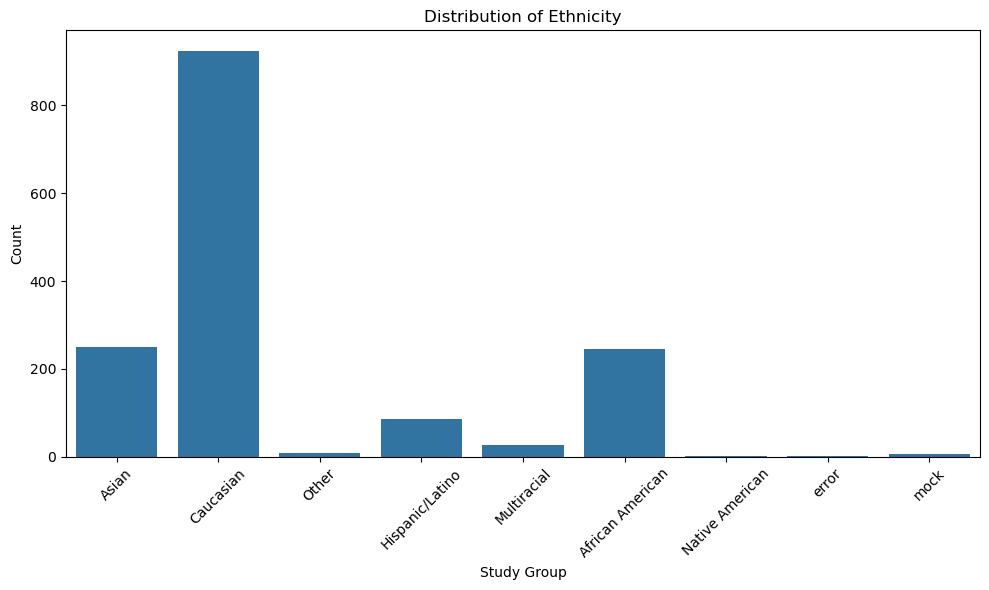

In [79]:

# Fourth cell - Visualize data distribution
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Ethnicity')
plt.title('Distribution of Ethnicity')
plt.xlabel('Study Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

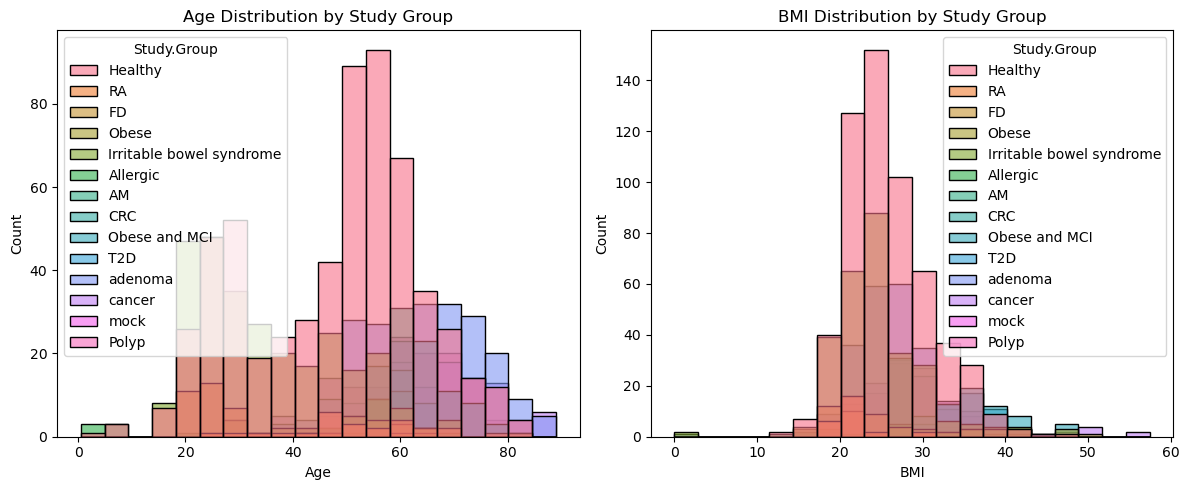

In [80]:

# Visualize numeric features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='Study.Group', bins=20, alpha=0.6)
plt.title('Age Distribution by Study Group')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='BMI', hue='Study.Group', bins=20, alpha=0.6)
plt.title('BMI Distribution by Study Group')
plt.tight_layout()
plt.show()

In [81]:
numerical_cols = df.select_dtypes(include=np.number).columns
string_cols = df.select_dtypes(include='object').columns

# Create a dictionary for fill values
fill_values = {}
for col in numerical_cols:
    fill_values[col] = 0
for col in string_cols:
    fill_values[col] = ' '

# Fill NaN values using the dictionary
df.fillna(value=fill_values, inplace=True)


In [82]:
df['Ethnicity'].value_counts()

Ethnicity
Caucasian           925
Asian               250
African American    245
Hispanic/Latino      85
                     70
Multiracial          27
Other                 9
mock                  5
Native American       2
error                 2
Name: count, dtype: int64

In [90]:
df = df[df['Ethnicity'] != 'error']
df = df[df['Ethnicity'] != ' ']
df = df[df['Ethnicity'] != 'Native American']
df = df[df['Ethnicity'] != 'mock']

In [91]:
df['Ethnicity'].value_counts()

Ethnicity
Caucasian           925
Asian               250
African American    245
Hispanic/Latino      85
Multiracial          27
Other                 9
Name: count, dtype: int64

In [94]:
# Fifth cell - Split data into development, validation, and test sets (80-10-10)
def split_data(df, target_col='Ethnicity'):
    """
    Split data into development (80%), validation (10%), and test (10%) sets.
    """
    # First split: 80% development, 20% remaining
    X = df.drop(target_col, axis=1)
    y = df[target_col]
    
    X_dev, X_temp, y_dev, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
    
    # Second split: divide the remaining 20% into validation (10%) and test (10%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    print(f"Development set: {X_dev.shape[0]} samples ({X_dev.shape[0]/X.shape[0]:.1%})")
    print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/X.shape[0]:.1%})")
    print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]:.1%})")
    
    return X_dev, X_val, X_test, y_dev, y_val, y_test

# Split the data
X_dev, X_val, X_test, y_dev, y_val, y_test = split_data(df)

Development set: 1078 samples (70.0%)
Validation set: 231 samples (15.0%)
Test set: 232 samples (15.1%)


In [95]:
# Sixth cell - Create preprocessor
def create_preprocessor():
    """
    Create a column transformer for preprocessing mixed data types.
    """
    # Identify categorical and numerical columns
    categorical_features = ['Sex', 'Country', 'Continent', 'Study.Group']
    numerical_features = ['Age', 'BMI']
    
    # Create preprocessors for different column types
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    # Combine transformers in a column transformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ])
    
    return preprocessor

# Create preprocessor and fit on development data
preprocessor = create_preprocessor()
X_dev_processed = preprocessor.fit_transform(X_dev)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# Encode target variable
le = LabelEncoder()
y_dev_encoded = le.fit_transform(y_dev)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)
print(f"Target classes: {le.classes_}")

Target classes: ['African American' 'Asian' 'Caucasian' 'Hispanic/Latino' 'Multiracial'
 'Other']


# Light GBM

In [100]:

# Seventh cell - Train LightGBM model
# Train LightGBM model
print("Training LightGBM model...")
lgb_model = lgb.LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
lgb_model.fit(
    X_dev_processed, y_dev_encoded,
    eval_set=[(X_val_processed, y_val_encoded)],
    eval_metric='multi_logloss'
)

# Make predictions
lgb_val_pred = lgb_model.predict(X_val_processed)
lgb_val_prob = lgb_model.predict_proba(X_val_processed)

# Evaluate LightGBM
print("\nLightGBM Classification Report:")
print(classification_report(y_val_encoded, lgb_val_pred, target_names=le.classes_))



Training LightGBM model...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 1078, number of used features: 21
[LightGBM] [Info] Start training from score -1.841199
[LightGBM] [Info] Start training from score -1.818077
[LightGBM] [Info] Start training from score -0.510516
[LightGBM] [Info] Start training from score -2.888518
[LightGBM] [Info] Start training from score -4.038424
[LightGBM] [Info] Start training from score -5.191103
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [101]:
y_val_encoded

array([2, 2, 5, 2, 2, 2, 0, 2, 1, 3, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 0, 2, 1, 2, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 2, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 4, 2, 1, 2, 0, 3, 2, 2, 0, 2,
       2, 1, 2, 1, 2, 0, 4, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       0, 1, 2, 4, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 2, 1,
       2, 2, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 1, 2, 0, 3, 4, 2, 2, 2, 1, 3, 0, 0, 2, 2, 3, 2, 0, 2, 2, 2, 3,
       1, 3, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 5, 0, 2, 3, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 0,
       1, 1, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2,
       2, 3, 0, 2, 0, 0, 0, 1, 0, 2, 2])

In [102]:
lgb_val_pred

array([2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 1, 2, 3, 2, 0, 3, 2, 2, 1, 0, 2, 3, 2, 2, 2, 2, 2, 2, 3, 1, 2,
       0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 3,
       2, 0, 2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 5, 2, 2, 4, 1, 0, 2, 2, 2, 2,
       2, 3, 0, 0, 2, 2, 2, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 3, 2, 2, 0,
       1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 3, 0, 2, 0, 0, 2, 2, 2, 2, 2])

In [108]:
# Evaluate LightGBM
print("\nLightGBM Classification Report:")
print(classification_report(y_val_encoded, lgb_val_pred, target_names=le.classes_))


LightGBM Classification Report:
                  precision    recall  f1-score   support

African American       0.75      0.57      0.65        37
           Asian       0.80      0.54      0.65        37
       Caucasian       0.76      0.89      0.82       139
 Hispanic/Latino       0.27      0.25      0.26        12
     Multiracial       0.00      0.00      0.00         4
           Other       0.00      0.00      0.00         2

        accuracy                           0.73       231
       macro avg       0.43      0.38      0.40       231
    weighted avg       0.72      0.73      0.71       231



# XGBoost

In [112]:
# Eighth cell - Train XGBoost model
# Train XGBoost model
print("Training XGBoost model...")
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
xgb_model.fit(
    X_dev_processed, y_dev_encoded,
    eval_set=[(X_val_processed, y_val_encoded)],
)

# Make predictions
xgb_val_pred = xgb_model.predict(X_val_processed)
xgb_val_prob = xgb_model.predict_proba(X_val_processed)

# Evaluate XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_val_encoded, xgb_val_pred, target_names=le.classes_))

Training XGBoost model...
[0]	validation_0-mlogloss:1.63204
[1]	validation_0-mlogloss:1.50982
[2]	validation_0-mlogloss:1.41214
[3]	validation_0-mlogloss:1.33053
[4]	validation_0-mlogloss:1.26090
[5]	validation_0-mlogloss:1.20135
[6]	validation_0-mlogloss:1.15112
[7]	validation_0-mlogloss:1.10722
[8]	validation_0-mlogloss:1.07006
[9]	validation_0-mlogloss:1.03680
[10]	validation_0-mlogloss:1.00821
[11]	validation_0-mlogloss:0.98291
[12]	validation_0-mlogloss:0.95994
[13]	validation_0-mlogloss:0.93858
[14]	validation_0-mlogloss:0.91989
[15]	validation_0-mlogloss:0.90248
[16]	validation_0-mlogloss:0.88726
[17]	validation_0-mlogloss:0.87433
[18]	validation_0-mlogloss:0.86113
[19]	validation_0-mlogloss:0.85115
[20]	validation_0-mlogloss:0.84165
[21]	validation_0-mlogloss:0.83336
[22]	validation_0-mlogloss:0.82414
[23]	validation_0-mlogloss:0.81672
[24]	validation_0-mlogloss:0.81038
[25]	validation_0-mlogloss:0.80374
[26]	validation_0-mlogloss:0.79855
[27]	validation_0-mlogloss:0.79304
[28]

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
# Ninth cell - Train AdaBoost model
# Train AdaBoost model
print("Training AdaBoost model...")
ada_model = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
ada_model.fit(X_dev_processed, y_dev_encoded)

# Make predictions
ada_val_pred = ada_model.predict(X_val_processed)
ada_val_prob = ada_model.predict_proba(X_val_processed)

# Evaluate AdaBoost
print("\nAdaBoost Classification Report:")
print(classification_report(y_val_encoded, ada_val_pred, target_names=le.classes_))



Training AdaBoost model...


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Classification Report:
                  precision    recall  f1-score   support

African American       1.00      0.35      0.52        37
           Asian       1.00      0.46      0.63        37
       Caucasian       0.73      0.88      0.80       139
 Hispanic/Latino       0.00      0.00      0.00        12
     Multiracial       0.03      0.25      0.06         4
           Other       0.00      0.00      0.00         2

        accuracy                           0.67       231
       macro avg       0.46      0.32      0.33       231
    weighted avg       0.76      0.67      0.67       231



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [114]:
# Tenth cell - Compare models
# Store models and their predictions
models = {
    'LightGBM': lgb_model,
    'XGBoost': xgb_model,
    'AdaBoost': ada_model
}

val_predictions = {
    'LightGBM': lgb_val_pred,
    'XGBoost': xgb_val_pred,
    'AdaBoost': ada_val_pred
}

val_probabilities = {
    'LightGBM': lgb_val_prob,
    'XGBoost': xgb_val_prob,
    'AdaBoost': ada_val_prob
}

# Calculate metrics for all models
def calculate_metrics(y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision_macro = precision_score(y_true, y_pred, average='macro')
    recall_macro = recall_score(y_true, y_pred, average='macro')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_prob, multi_class='ovr')
    
    return {
        'accuracy': accuracy,
        'precision_macro': precision_macro,
        'recall_macro': recall_macro,
        'f1_macro': f1_macro,
        'roc_auc': roc_auc
    }

# Collect metrics for all models
metrics = {}
for model_name, y_pred in val_predictions.items():
    metrics[model_name] = calculate_metrics(y_val_encoded, y_pred, val_probabilities[model_name])

# Create comparison dataframe
model_comparison = pd.DataFrame({
    model_name: {
        metric: value for metric, value in model_metrics.items()
    } for model_name, model_metrics in metrics.items()
}).T

# Display comparison
print("Model Comparison on Validation Set:")
model_comparison

Model Comparison on Validation Set:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,accuracy,precision_macro,recall_macro,f1_macro,roc_auc
LightGBM,0.727273,0.430577,0.375032,0.395563,0.776873
XGBoost,0.744589,0.465631,0.347838,0.377844,0.798819
AdaBoost,0.666667,0.459843,0.324284,0.333981,0.751580


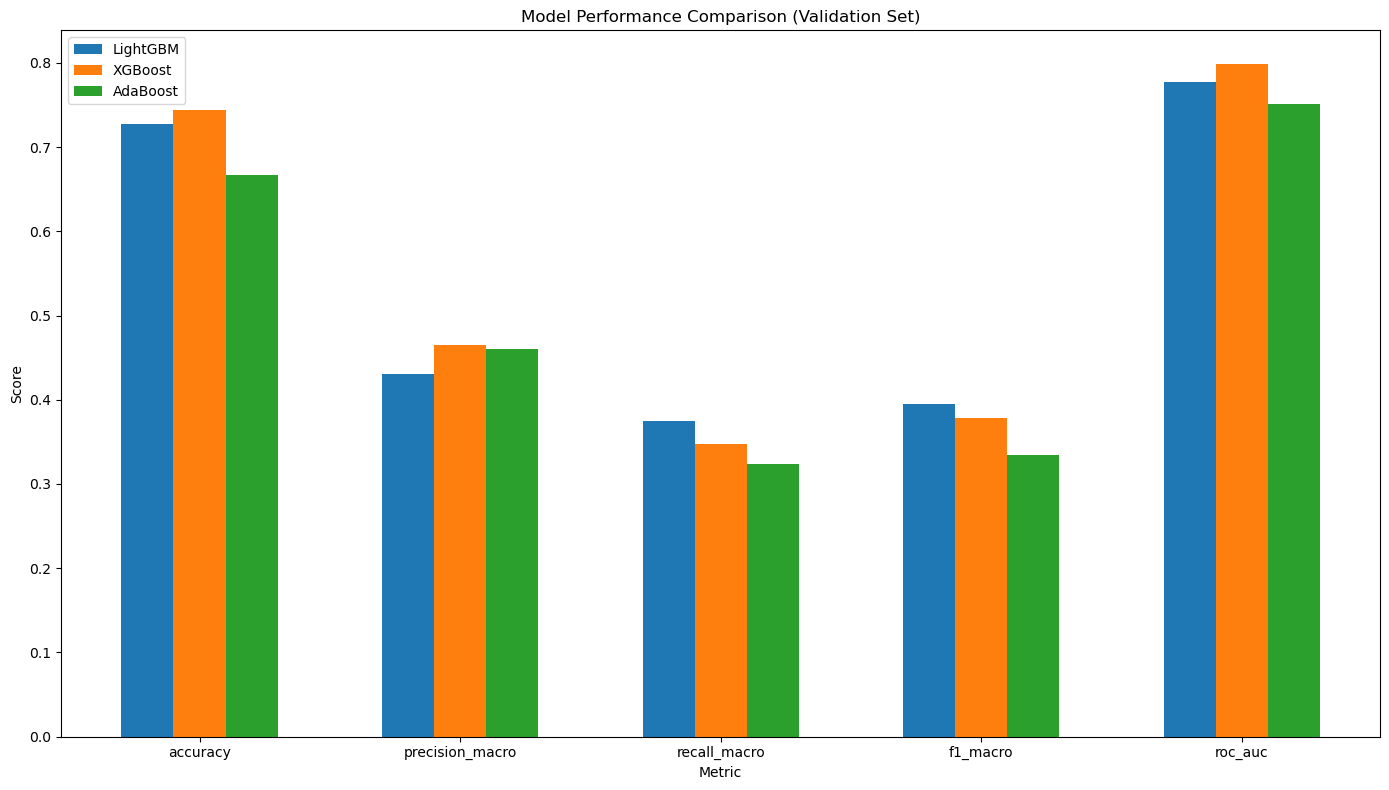

In [117]:
# Eleventh cell - Visualize model comparison
# Visualize model comparison
metrics_to_plot = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro', 'roc_auc']
plt.figure(figsize=(14, 8))

# Create bar chart
bar_width = 0.2
x = np.arange(len(metrics_to_plot))

for i, (model_name, model_metrics) in enumerate(metrics.items()):
    plt.bar(x + i*bar_width, 
            [model_metrics[metric] for metric in metrics_to_plot], 
            width=bar_width, 
            label=model_name)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title('Model Performance Comparison (Validation Set)')
plt.xticks(x + bar_width, metrics_to_plot)
plt.legend()
plt.tight_layout()
plt.show()

In [119]:

# Twelfth cell - Select best model and evaluate on test set
# Select best model based on F1 score
best_model_name = model_comparison['f1_macro'].idxmax()
best_model = models[best_model_name]
print(f"Best model based on F1 score: {best_model_name}")

# Make predictions on test set
test_pred = best_model.predict(X_test_processed)
test_prob = best_model.predict_proba(X_test_processed)

# Calculate metrics on test set
test_metrics = calculate_metrics(y_test_encoded, test_pred, test_prob)

# Display test metrics
print(f"\n{best_model_name} Test Set Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")

# Display classification report
print(f"\n{best_model_name} Test Set Classification Report:")
print(classification_report(y_test_encoded, test_pred, target_names=le.classes_))

Best model based on F1 score: LightGBM

LightGBM Test Set Metrics:
accuracy: 0.8103
precision_macro: 0.6890
recall_macro: 0.5027
f1_macro: 0.5504
roc_auc: 0.8829

LightGBM Test Set Classification Report:
                  precision    recall  f1-score   support

African American       0.88      0.57      0.69        37
           Asian       0.87      0.71      0.78        38
       Caucasian       0.80      0.95      0.87       139
 Hispanic/Latino       0.58      0.54      0.56        13
     Multiracial       1.00      0.25      0.40         4
           Other       0.00      0.00      0.00         1

        accuracy                           0.81       232
       macro avg       0.69      0.50      0.55       232
    weighted avg       0.81      0.81      0.80       232



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packag

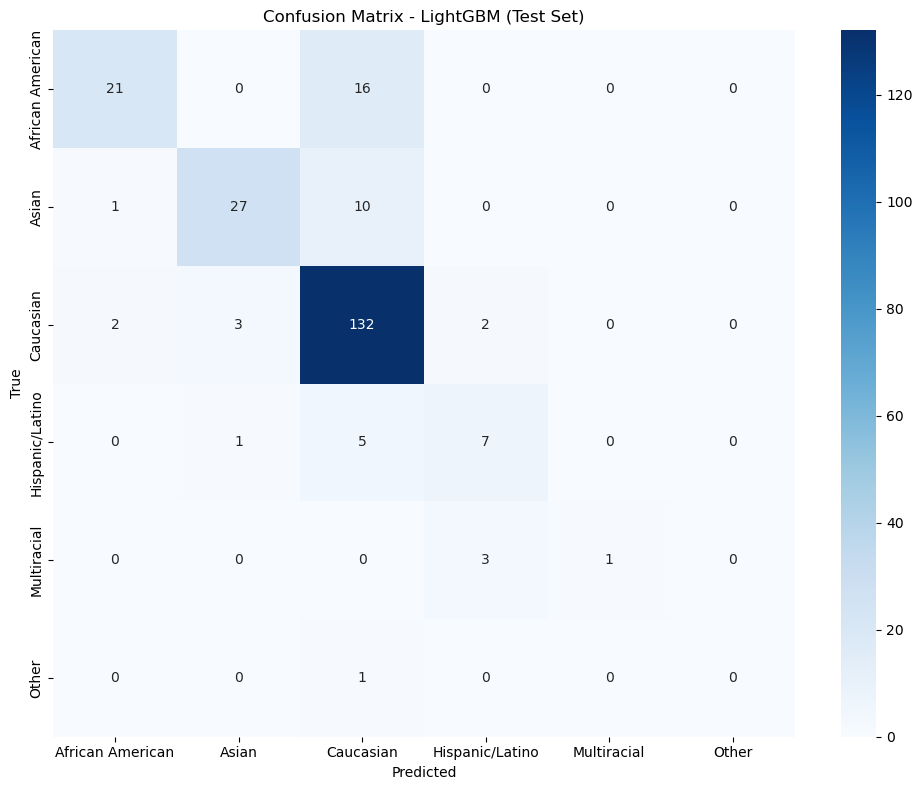

In [120]:



# Thirteenth cell - Create confusion matrix for best model
# Create confusion matrix
cm = confusion_matrix(y_test_encoded, test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=le.classes_,
           yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - {best_model_name} (Test Set)')
plt.tight_layout()
plt.show()

In [121]:


# Fourteenth cell - Analyze feature importance for best model
# Extract feature names
def get_feature_names(preprocessor):
    # Get numerical feature names
    numerical_features = ['Age', 'BMI']
    
    # Get categorical feature names with one-hot encoding
    categorical_features = ['Sex', 'Country', 'Continent', 'Ethnicity']
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = onehot_encoder.get_feature_names_out(categorical_features)
    
    # Combine all feature names
    feature_names = numerical_features.copy()
    feature_names.extend(cat_feature_names)
    
    return feature_names

# Check if the best model supports feature importance
if best_model_name in ['LightGBM', 'XGBoost']:
    # Get feature names
    feature_names = get_feature_names(preprocessor)
    
    # Get feature importance
    importances = best_model.feature_importances_
    
    # Create dataframe for visualization
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    
    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
    
    # Display top features
    print(f"Top 15 Important Features - {best_model_name}:")
    print(feature_importance_df.head(15))
else:
    print(f"Feature importance visualization not implemented for {best_model_name}")


ValueError: input_features is not equal to feature_names_in_

In [122]:
# Fifteenth cell - Visualize feature importance
if best_model_name in ['LightGBM', 'XGBoost']:
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = feature_importance_df.head(15)
    sns.barplot(x='Importance', y='Feature', data=top_features)
    plt.title(f'Top 15 Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()


NameError: name 'feature_importance_df' is not defined

<Figure size 1200x800 with 0 Axes>

In [ ]:

# Sixteenth cell - Compare performance across datasets
# Calculate metrics on development set
dev_pred = best_model.predict(X_dev_processed)
dev_prob = best_model.predict_proba(X_dev_processed)
dev_metrics = calculate_metrics(y_dev_encoded, dev_pred, dev_prob)

# Create performance comparison dataframe
performance_comparison = pd.DataFrame({
    'Development': dev_metrics,
    'Validation': metrics[best_model_name],
    'Test': test_metrics
})

# Display performance comparison
print(f"Performance Comparison for {best_model_name} Across Datasets:")
performance_comparison

In [ ]:


# Seventeenth cell - Visualize performance across datasets
# Visualize performance across datasets
plt.figure(figsize=(14, 8))

# Create bar chart
bar_width = 0.25
x = np.arange(len(metrics_to_plot))

for i, (dataset_name, dataset_metrics) in enumerate(performance_comparison.items()):
    plt.bar(x + i*bar_width, 
            [dataset_metrics[metric] for metric in metrics_to_plot], 
            width=bar_width, 
            label=dataset_name)

plt.xlabel('Metric')
plt.ylabel('Score')
plt.title(f'{best_model_name} Performance Across Datasets')
plt.xticks(x + bar_width, metrics_to_plot)
plt.legend()
plt.tight_layout()
plt.show()
